In [1]:
import os
import re
import glob
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
unet_non_parallel_ops = {}
unet_parallel_ops     = {}
fpn_non_parallel_ops  = {}
fpn_parallel_ops      = {}

filenames = glob.glob("../logs/*.pkl")
num_processes_list = set()

for filename in filenames:
    bname = os.path.basename(filename)
    num_processes = list(map(int, re.findall(r'\d+', bname)))[0]
    
    num_processes_list.add(num_processes)
    process_info = None
    with open(filename, 'rb') as handle:
        process_info = pickle.load(handle)
    
    if bname.startswith('expfpn_False'):
        fpn_non_parallel_ops[num_processes] = process_info
    elif bname.startswith('expfpn_True'):
        fpn_parallel_ops[num_processes] = process_info
    elif bname.startswith('expunet_False'):
        unet_non_parallel_ops[num_processes] = process_info
    elif bname.startswith('expunet_True'):
        unet_parallel_ops[num_processes] = process_info
    else:
        num_processes_list.remove(num_processes)

In [3]:
num_processes_list = list(num_processes_list)

df = pd.DataFrame(columns = ['Num workers', 'Time taken', 'test iou score', 'Parallel', 'Model'])
for nw in num_processes_list:
    df = df.append({
        'Num workers': nw,
        'Time taken' : fpn_non_parallel_ops[nw]['time_taken'],
        'test iou score': fpn_non_parallel_ops[nw]['valid'][-1]['iou_score'],
        'Parallel'   : False,
        'Model' : 'FPN'
    }, ignore_index=True)
    df = df.append({
        'Num workers': nw,
        'Time taken' : fpn_parallel_ops[nw]['time_taken'],
        'test iou score': fpn_parallel_ops[nw]['valid'][-1]['iou_score'],
        'Parallel'   : True,
        'Model' : 'FPN'
    }, ignore_index=True)
    df = df.append({
        'Num workers': nw,
        'Time taken' : unet_non_parallel_ops[nw]['time_taken'],
        'test iou score': unet_non_parallel_ops[nw]['valid'][-1]['iou_score'],
        'Parallel'   : False,
        'Model' : 'UNET'
    }, ignore_index=True)
    df = df.append({
        'Num workers': nw,
        'Time taken' : unet_parallel_ops[nw]['time_taken'],
        'test iou score': unet_parallel_ops[nw]['valid'][-1]['iou_score'],
        'Parallel'   : True,
        'Model' : 'UNET'
    }, ignore_index=True)


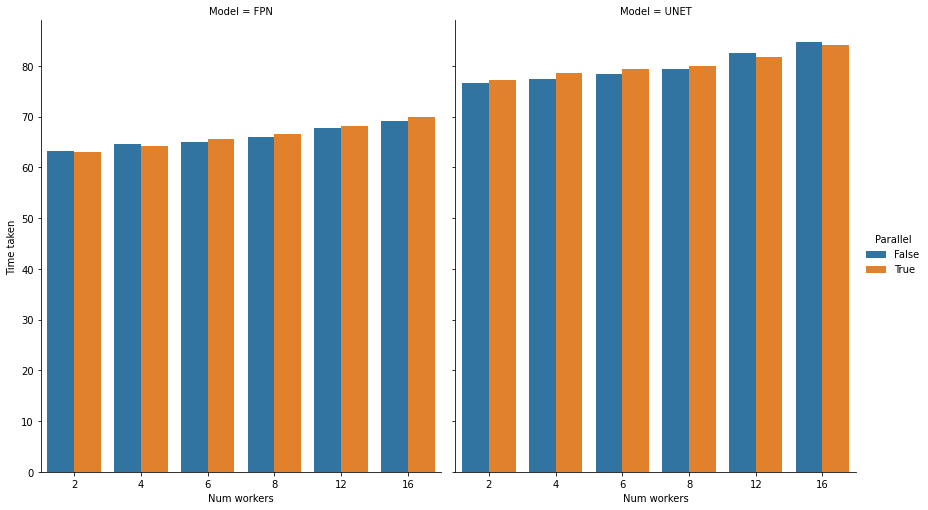

In [4]:
sns.catplot(x="Num workers", y="Time taken",
        hue="Parallel", col="Model",
        data=df, kind="bar",
        height=7, aspect=.85);

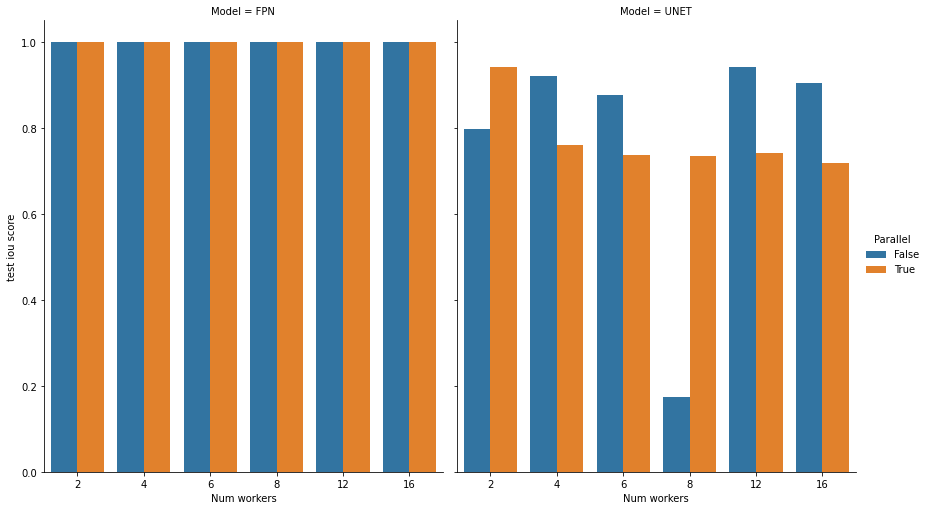

In [5]:
sns.catplot(x="Num workers", y="test iou score",
        hue="Parallel", col="Model",
        data=df, kind="bar",
        height=7, aspect=.85);